In [1]:
#import all dependenices
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost
import sklearn
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#read csv heat_failure data using pandas
df = pd.read_csv("C:\\Users\\User\\Downloads\\heart_failure.csv")
df.sample(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
295,55.0,0,1820,0,38,0,270000.00,1.20,139,0,0,271,0
53,70.0,1,69,1,50,1,351000.00,1.00,134,0,0,44,1
169,70.0,0,835,0,35,1,305000.00,0.80,133,0,0,145,0
220,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198,1
112,50.0,0,369,1,25,0,252000.00,1.60,136,1,0,90,0


In [34]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [3]:
df.head(1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
#check null values in each features
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# Performing EDA

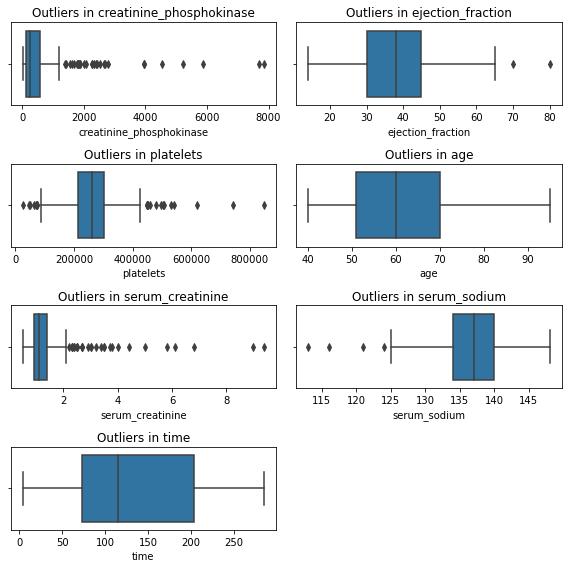

In [6]:
# visualise ouliers in continuous variables/features
col =['creatinine_phosphokinase','ejection_fraction','platelets','age','serum_creatinine','serum_sodium','time']
fig, axes = plt.subplots(4,2,figsize=(8,8))

a,b,c=4,2,1
for i in col:
    plt.subplot(a,b,c)
    plt.xlabel(i)
    sns.boxplot(df[i])
    plt.title("Outliers in {}".format(i))
    c+=1
    plt.tight_layout()
    axes.flat[-1].set_visible(False)
plt.show()

In [7]:
# Perform upsampling on imbalanced dataset(No. of "DEATH_EVENT"==0 >> "DEATH_EVENT"==1)
# Separate majority and minority classes
df_majority = df[df.DEATH_EVENT==0]
df_minority = df[df.DEATH_EVENT==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=200, 
                                 random_state=123) 
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled['DEATH_EVENT'].value_counts()

0    203
1    200
Name: DEATH_EVENT, dtype: int64

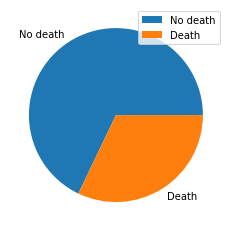

In [8]:
# pie-chart of "DEATH_EVENT" before upsampling
pie = df['DEATH_EVENT'].value_counts()
label = ["No death","Death"]
plt.pie(pie,labels=label)
plt.legend()

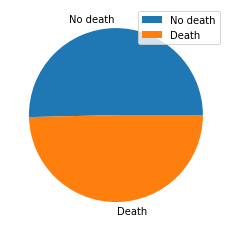

In [9]:
# pie-chart of "DEATH_EVENT" after upsampling
pie = df_upsampled['DEATH_EVENT'].value_counts()
label = ["No death","Death"]
plt.pie(pie,labels=label)
plt.legend()

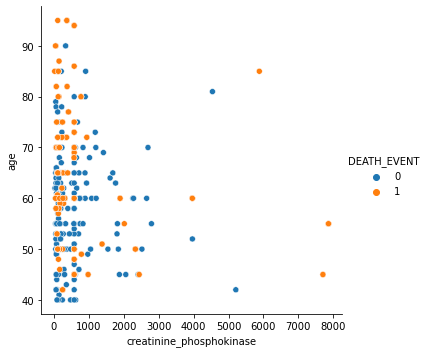

In [10]:
sns.relplot(x="creatinine_phosphokinase",y="age",hue="DEATH_EVENT",data=df_upsampled)

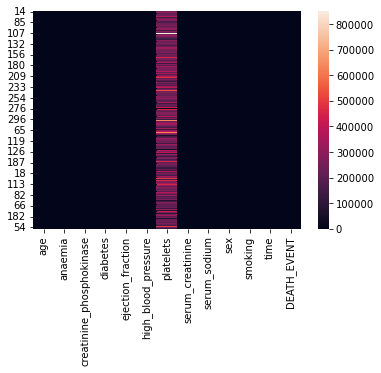

In [11]:
sns.heatmap(df_upsampled)

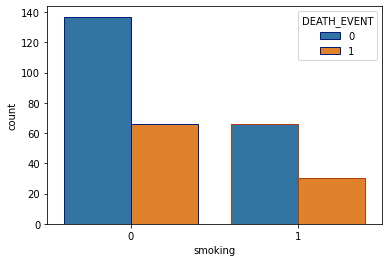

In [12]:
sns.countplot(x="smoking",hue="DEATH_EVENT",data=df,edgecolor=sns.color_palette("dark"))

In [13]:
corr_df = df.corr()
corr_df = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))

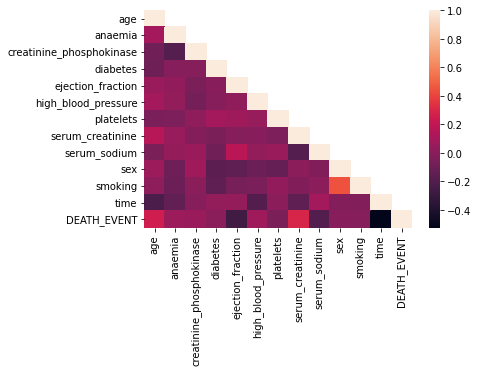

In [14]:
sns.heatmap(corr_df)

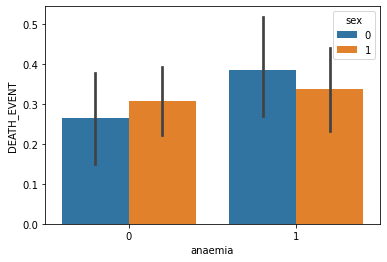

In [15]:
sns.barplot(x="anaemia",y="DEATH_EVENT",hue="sex",data=df)

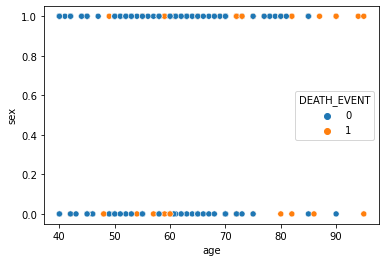

In [16]:
sns.scatterplot(x="age",y="sex",hue="DEATH_EVENT",data=df)

In [17]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [18]:
# remove outliers from all features using z-score
z_scores = stats.zscore(df_upsampled)
abs_z_score = np.abs(z_scores)
filtered_entries = (abs_z_score<=3).all(axis=1)
df_upsampled = df_upsampled[filtered_entries]
df = df_upsampled

In [19]:
X = df.drop('DEATH_EVENT',axis=1)  # dependent features
y = df['DEATH_EVENT']              # independent feature 

# Split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=230)

In [20]:
# hyperparameter tuning using randomizedsearchcv
model=xgboost.XGBClassifier()
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

random_search=RandomizedSearchCV(model,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [21]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [22]:
from datetime import datetime
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[23:33:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 10.33 seconds.


In [23]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 12,
 'learning_rate': 0.25,
 'gamma': 0.4,
 'colsample_bytree': 0.4}

In [25]:
model=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=10,
              min_child_weight=5, missing=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
# fit the train data into xgbclassifier algorithm
model.fit(X_train,y_train)

[23:33:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=10,
              min_child_weight=5, missing=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
X_train.shape

(260, 12)

In [28]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
train_acc = accuracy_score(y_train,train_pred)
test_acc = accuracy_score(y_test,test_pred)

In [29]:
print("Accuracy on TRAIN data {}".format(train_acc))
print("Accuracy on TEST data {}".format(test_acc))

Accuracy on TRAIN data 0.9576923076923077
Accuracy on TEST data 0.9107142857142857


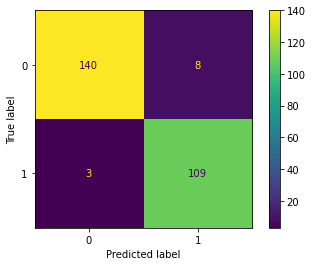

In [30]:
# confusion matrix for train data
sklearn.metrics.plot_confusion_matrix(model,X_train,y_train)

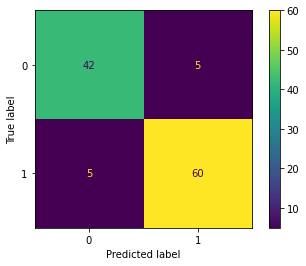

In [31]:
# confusion matrix for test data
sklearn.metrics.plot_confusion_matrix(model,X_test,y_test)

In [32]:
import pickle
file=open("heart_prediction.pkl",'wb')
pickle.dump(model,file)
file.close()